# Проект: Принятие решений в бизнесе

Я, в роли аналитика крупного интернет-магазина, подготовил список гипотез для увеличения выручки совместно с отделом маркетинга. Необходимо приоритизировать гипотезы,запустить A/B тест, а также проанализировать результаты.

# Описание данных

**Данные для первой части**  
Структура hypothesis.csv:  
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  

**Данные для второй части**  
Структура orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.  

Структура visitors.csv:  
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# План работы
**Часть 1. Приоритизирование гипотез  
Часть 2. Анализирование A/B-теста** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

### Приоритизация гипотез

In [3]:
pd.options.display.max_colwidth = 1
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower()
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Применение фреймворка ICE для приоритизации гипотез

In [25]:
hypothesis['ICE'] = round(hypothesis.impact * hypothesis.confidence / hypothesis.efforts, 3)
display(hypothesis[['hypothesis', 'ICE']].sort_values('ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


#### Применение фреймворк RICE для приоритизации гипотез

In [26]:
hypothesis['RICE'] = (hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts)
display(hypothesis[['hypothesis', 'RICE']].sort_values('RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** при использовании фреймворка ICE топ-3 составляли гипотезы под индексом 8, 0, 7. В свою очередь у RICE это 7, 2, 0. Гипотезы изменили своё положение из-за компонента Reach(охват). Так, например, у гипотезы 7 он составляет оценку 10, а У 8 всего 1. Следовательно, положение в таблицах меняется по причине того, на какое число людей желаемое внесение изменений полвияет.

### Анализ A/B тест

#### Чтение и запись данных в переменные

In [4]:
def info_frames(*frames):
    for frame in frames:
        frame.info()
        print()
        print('\033[1m' + 'Количество дубликатов в таблице:' + '\033[0m', frame.duplicated().sum())
        print()       

In [5]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
orders.columns = orders.columns.str.lower().str.replace('id', '_id')
info_frames(orders, visitors)
display(orders.head(5), visitors.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

Количество дубликатов в таблице: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

Количество дубликатов в таблице: 0



,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [29]:
print('Число пользователей, оказавшихся одновременно в двух группах: {}'.format(
    orders.query('group == "A"')[['visitor_id', 'group']].drop_duplicates().merge(
    orders.query('group == "B"')[['visitor_id', 'group']].drop_duplicates(), on='visitor_id').shape[0]))
print('Доля повторяющихся пользователей от всех: {}%'.format(round(orders
    .query('group == "A"')[['visitor_id', 'group']].drop_duplicates()
    .merge(orders.query('group == "B"')[['visitor_id', 'group']]
    .drop_duplicates(), on='visitor_id').shape[0] / orders[['visitor_id', 'group']].drop_duplicates().shape[0], 3) * 100))

Число пользователей, оказавшихся одновременно в двух группах: 58
Доля повторяющихся пользователей от всех: 5.3%


**Вывод:** пропуски и дубликаты в таблицах отсутствуют. В двух группах оказалось 58 покупателя. Оставлю этих пользователей, так как они составляют незначительную долю.

#### Создание таблицы данных с накоплением

In [30]:
dates_groups = orders[['date', 'group']].drop_duplicates()
agregated_orders = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'transaction_id' : pd.Series.nunique,
            'visitor_id' : pd.Series.nunique,
            'revenue' : 'sum'
        }), axis = 1).sort_values(by = ['date', 'group'])

agregated_visitors = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
        {
            'date' : 'max',
            'group' : 'max',
            'visitors' : 'sum'
        }), axis = 1).sort_values(by = ['date', 'group'])
data_cumulative = agregated_orders.merge(agregated_visitors, left_on=['date', 'group'], right_on=['date', 'group'])
data_cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(data_cumulative.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Построение графика кумулятивной выручки по группам

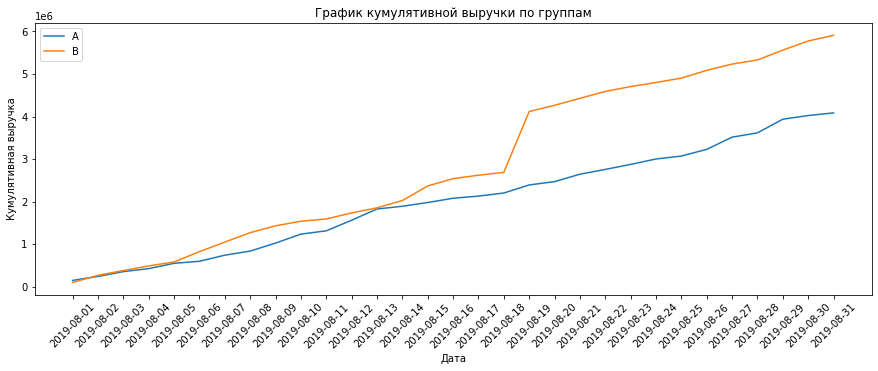

In [31]:
data_cumulative_a = data_cumulative[data_cumulative.group == 'A'][['date', 'revenue', 'orders']]
data_cumulative_b = data_cumulative[data_cumulative.group == 'B'][['date', 'revenue', 'orders']]
plt.figure(figsize=(15, 5));
plt.plot(data_cumulative_a['date'], data_cumulative_a['revenue'], label='A');
plt.plot(data_cumulative_b['date'], data_cumulative_b['revenue'], label='B');
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата');
plt.ylabel('Кумулятивная выручка');
plt.xticks(rotation=45)
plt.legend();

**Вывод:** В течение всего теста выручка увеличивается. График группы A растет равномерно и приносит стабильной меньше выручки. Что касается графика группы B, то в его росте наблюдаются скачки. Вероятнее всего этому способствуют либо появления дорогих заказов в выборке, либо увеличение числа заказов.

#### Построение графика кумулятивного среднего чека по группам

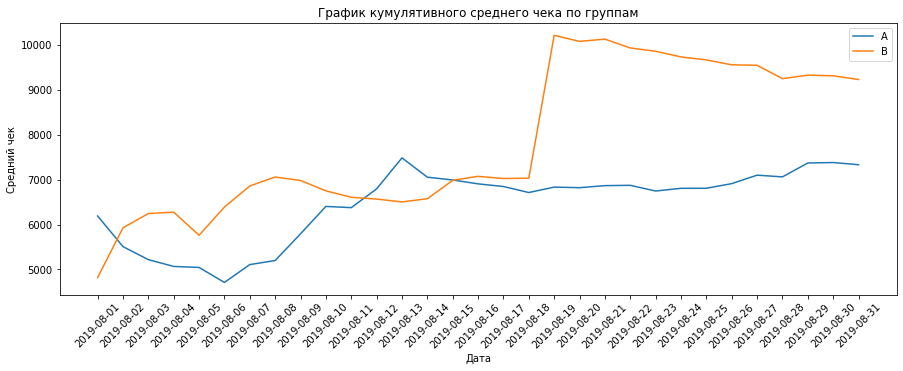

In [32]:
plt.figure(figsize=(15, 5));
plt.plot(data_cumulative_a['date'], data_cumulative_a['revenue'] / data_cumulative_a['orders'], label = 'A');
plt.plot(data_cumulative_b['date'], data_cumulative_b['revenue'] / data_cumulative_b['orders'], label = 'B');
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата');
plt.ylabel('Средний чек');
plt.xticks(rotation=45)
plt.legend();

**Вывод:** Также продолжает колебаться кумулятивное значение среднего чека по группам. Возможно требуется дополнительный анализ выбросов, которые могут искажать результаты.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

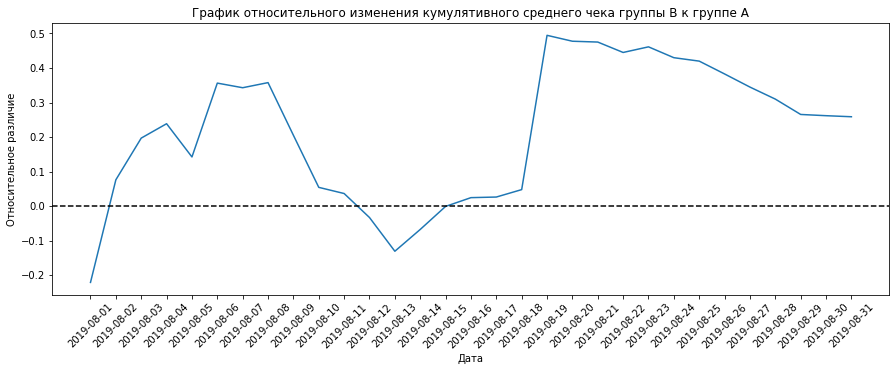

In [33]:
data_cumulative_merged = data_cumulative_a.merge(
    data_cumulative_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
plt.figure(figsize=(15, 5));
plt.plot(
    data_cumulative_merged['date'], 
    (data_cumulative_merged['revenueB']/data_cumulative_merged['ordersB'])/
    (data_cumulative_merged['revenueA']/data_cumulative_merged['ordersA'])-1
);
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата');
plt.ylabel('Относительное различие');
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

**Вывод:** Результаты теста сильно и внезапно изменялись в определенные даты, что, вероятно, указывает на наличие аномальных заказов в эти периоды.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам

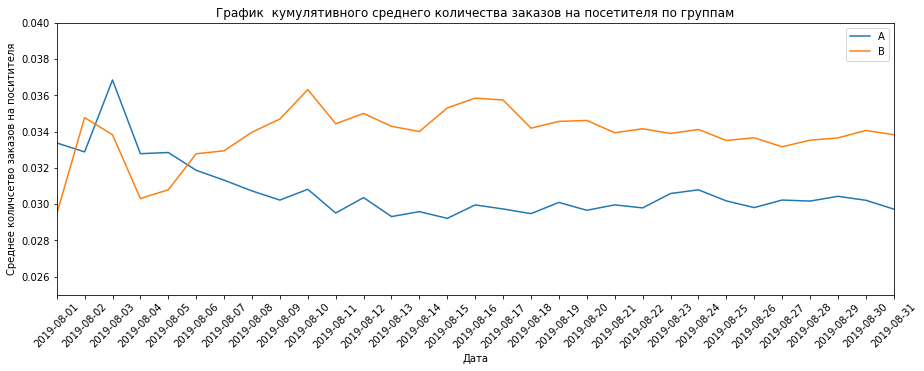

In [34]:
data_cumulative['conversion'] = data_cumulative['orders'] / data_cumulative['visitors']
new_data_cumulative_a = data_cumulative[data_cumulative.group == 'A']
new_data_cumulative_b = data_cumulative[data_cumulative.group == 'B']
plt.figure(figsize=(15, 5));
plt.plot(new_data_cumulative_a['date'], new_data_cumulative_a['conversion'], label = 'A');
plt.plot(new_data_cumulative_b['date'], new_data_cumulative_b['conversion'], label = 'B');
plt.title('График  кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата');
plt.ylabel('Среднее количсетво заказов на поситителя');
plt.xticks(rotation=45)
plt.legend();
plt.axis(["2019-08-01", '2019-08-31', 0.025, 0.04]);

**Вывод:** В начале теста пользователели из группы B делали в среднем примерно меньше заказов, а после определённой даты ситуация изменилась. График сегмента B cтабилизировался и закрепился примерно на одном уровне, превышающем значение сегмента A. Различия в начале и в конце составляют около 2 и 4 процентов.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

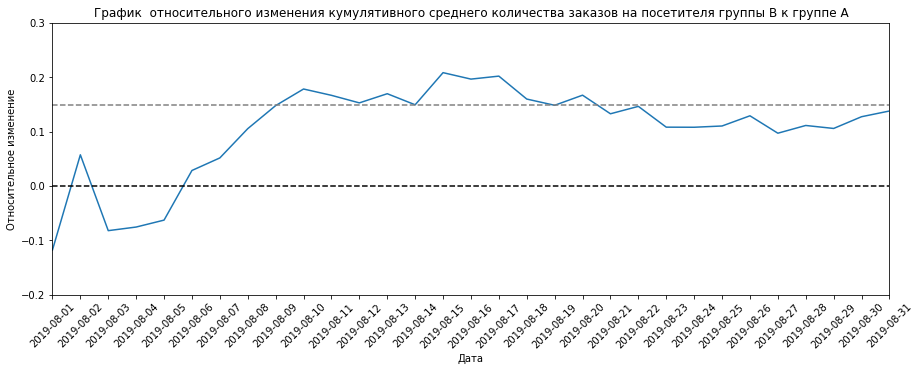

In [35]:
cumulative_conversions_merged = new_data_cumulative_a[['date', 'conversion']].merge(
    new_data_cumulative_b[['date', 'conversion']], left_on='date', 
    right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 5));
plt.plot(cumulative_conversions_merged['date'], 
         cumulative_conversions_merged['conversionB'] / cumulative_conversions_merged['conversionA'] - 1)
plt.xticks(rotation=45)
plt.title('График  относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A');
plt.xlabel('Дата');
plt.ylabel('Относительное изменение');
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.15, color='grey', linestyle='--');
plt.axis(["2019-08-01", '2019-08-31', -0.2, 0.3]);

**Вывод:** С начала сегмент B незначительно проигрывал сегменту A, затем вышел вперёд. Группа B лидирует по метрике становясь лучше или же фиксируясь в районе 15% прироста. 

#### Построение точечного графика количества заказов по пользователям

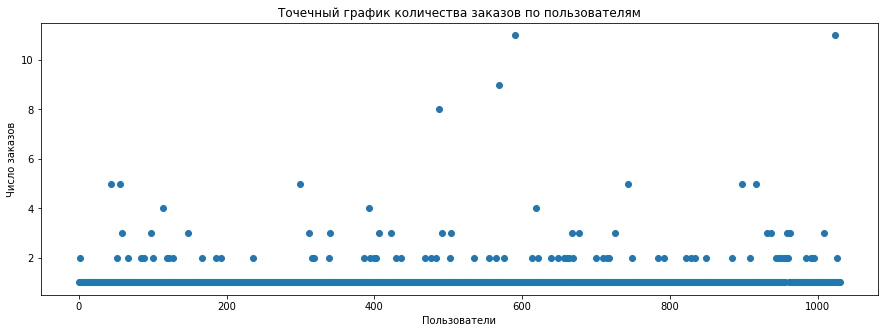

In [36]:
order_by_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
order_by_user.columns = ['visitor_id', 'orders']
x_values = pd.Series(range(0, len(order_by_user)))
plt.figure(figsize=(15, 5));
plt.scatter(x_values, order_by_user.orders);
plt.title('Точечный график количества заказов по пользователям');
plt.xlabel('Пользователи');
plt.ylabel('Число заказов');

**Вывод:** Достаточно много покупателей с числом заказов от 2 и более. Точная доля этих данных не определена — неясно, следует ли считать их аномалиями.

#### Подсчёт 95-й и 99-й перцентилей количества заказов на пользователя

In [37]:
print(f'Не более 5% процентов пользователей делали больше чем {int(np.percentile(order_by_user.orders, [95])[0])} заказа')
print(f'Не более 1% процента пользователей делали больше чем {int(np.percentile(order_by_user.orders, [99])[0])} заказа')

Не более 5% процентов пользователей делали больше чем 2 заказа
Не более 1% процента пользователей делали больше чем 4 заказа


**Вывод:** Целесообразно установить верхний предел числа заказов на уровне 2 заказов на одного пользователя и исключить аномальных покупателей на основе этого критерия.

#### Построение точечного графика стоимостей заказов

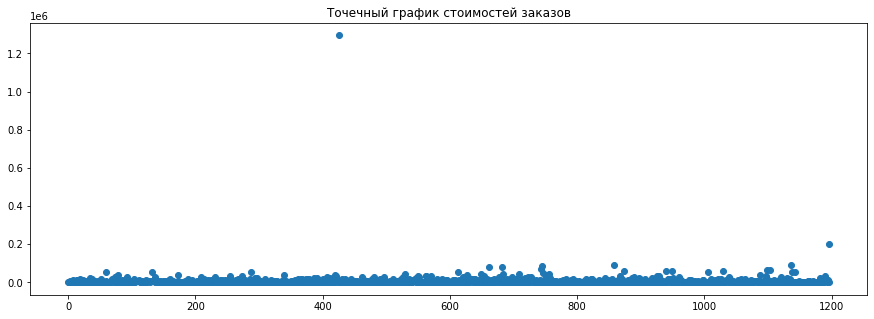

In [38]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(15, 5));
plt.title('Точечный график стоимостей заказов');
plt.scatter(x_values, orders.revenue); 

На графике расположены 2 слишком аномальных значения, из за чего не удаётся оценить количество заказов. Ограничу ось y.

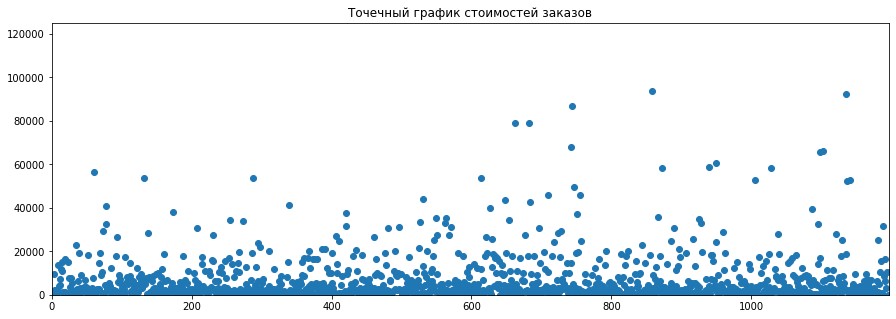

In [39]:
x_values = pd.Series(range(0, len(orders)))
plt.figure(figsize=(15, 5));
plt.title('Точечный график стоимостей заказов');
plt.scatter(x_values, orders.revenue); 
plt.axis([0, len(orders), 0, 125000]);

**Вывод:** Присутствуют какая то часть дорогих заказов. На основании графика можно установить порог для аномальных заказов в диапазоне от 20 000 до 40 000 рублей.

#### Подсчёт 95-й и 99-й перцентилей стоимости заказов

In [40]:
print(f'Не более 5% процентов пользователей делали заказ больше чем {int(np.percentile(orders.revenue, [95])[0])} рублей')
print(f'Не более 1% процента пользователей делали заказ больше чем {int(np.percentile(orders.revenue, [99])[0])} рублей')

Не более 5% процентов пользователей делали заказ больше чем 28000 рублей
Не более 1% процента пользователей делали заказ больше чем 58233 рублей


**Вывод:** Целесообразно установить верхний предел стоимости заказа на уровне 28000 рублей и исключить аномальные заказы на основе этого критерия.

#### Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**H0:** различий в среднем количестве заказов между группами нет.  
**H1:** различия в среднем между группами есть.  
Уровень статистической значимости alpha = 0.05  
Критерий проверки гипотез: U-критерий Манна — Уитни.

In [41]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_a.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
]

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_per_date_B', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_b.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
]

data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(
    0, index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(
    0, index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

print("p-value: {0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print("Относительное различие в среднем между группами: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.01679
Относительное различие в среднем между группами: 0.138


**Вывод:** P-value значительно меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ исходных данных показывает, что среднее количество заказов между группами отличается статистически значимо. Относительный прирост среднего количества заказов в группе B по сравнению с группой A составляет 13.8%.

#### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**H0:** различий в среднем чеке между группами нет.  
**H1:** различия в среднем чеке между группами есть.  
Уровень статистической значимости alpha = 0.05  
Критерий проверки гипотез: U-критерий Манна — Уитни.

In [42]:
print('p-value: {0:.3f}'.format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами: {0:.3f}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
Относительные различия в среднем чеке между группами: 0.259


**Вывод:** P-value значительно превышает 0.05. Это означает, что нет оснований отвергать нулевую гипотезу и утверждать, что существуют различия в среднем чеке. Кроме того, разница в среднем чеке между сегментами составляет 25.9%

#### Подсчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Считаем аномальными пользователей, которые сделали 4 и более заказов или оформили заказ на сумму свыше 30 000 рублей. Таким образом, мы исключим 1% пользователей с наибольшим количеством заказов и от 1% до 5% пользователей с самыми дорогими заказами.

In [43]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 3]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 30000]['visitor_id']
a_b_normal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(a_b_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(a_b_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value: {0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительное различие в среднем между группами: {0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value: 0.01832
Относительное различие в среднем между группами: 0.148


**Вывод:** Как и в случае с необработанными данными, статистическая значимость достигнута. Сегмент B значительно превосходит сегмент A.

#### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

In [44]:
print(
    'p-value: {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(a_b_normal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(a_b_normal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека: {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(a_b_normal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(a_b_normal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.958
Относительный прирост среднего чека: -0.020


**Вывод:** P-value увеличился, но и разница между сегментами значительно сократилась с превосходства группы B в 25.9% до 2% снижения относительно группы A.

### Результаты проекта

- При применении фреймворка RICE ранжирование гипотез изменилось по сравнению с фреймворком ICE. Это произошло из-за компонента Reach (охват). Например, у гипотезы 7 охват оценивается в 10, тогда как у гипотезы 8 — всего в 1. Таким образом, изменение положения гипотез в таблицах обусловлено тем, на сколько людей повлияют предполагаемые изменения.  
- В результате, существуют статистически значимые различия в среднем количестве заказов между группами как в необработанных данных, так и в данных после удаления аномалий. Отсутствует статистически значимое различие в среднем чеке между группами как в необработанных данных, так и в данных после удаления аномалий. График, показывающий относительную разницу в кумулятивном среднем количестве заказов между группами, указывает на то, что результаты группы B стабильно превосходят результаты группы A. График относительного различия кумулятивного среднего чека показывает, что результаты группы B нестабильны по сравнению с группой A. Как раз после отсечения аномальных значений в среднем чеке заказов, выяснилось что различия между сегментами незначительны. На основании выявленных данных, тест необходимо завершить и признать, что группа B одержала победу над группой A.